In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
N_points = 1000
Nbins    = 100
xmin     = 0.0
xmax     = 10.0
binwidth = (xmax - xmin)/Nbins
k        = binwidth * N_points   #normalization of the pdf
x_set    = np.linspace(xmin,100000, Nbins) #x is in [0,inf[
x        = []
C        = 1  #Probability normalization integrate PDF in x must be 1 and the PDF is already 1

In [3]:
r = np.random
r.seed(42)

In [4]:
def PDF(C, x):
    return C * x * np.exp(-x) 
def Norm_PDF(C, x):
    return k * PDF(C, x)
#Inverting
#x_inv   = np.random.uniform(size = N_points)
#x_trans = - C * (x_inv + 1) * np.exp(-x_inv)
#Hard time find inverse-->Accept/Reject

In [5]:
N_try = 0.0
ymin  = 0.0     #f(x=0 & inf)=0 minimum value of f
ymax  = 1/np.e  #df(x)= 0 = -e^(-x) * (x-1) --> e^-1 when x = 1 maximum value of f

x_acc = np.zeros(N_points)  #accepted values

In [6]:
for i in range(N_points):
    
    while True:
    
        N_try += 1                      #counter
        x_test = r.uniform(xmin, xmax)  #range of x in f(x)
        y_test = r.uniform(ymin, ymax)  #range of y in which lay the desired values
    
        if (y_test < PDF(C, x_test)):
            break
        
    x_acc[i] = x_test

In [7]:
eff           = N_points / N_try   #Efficiency
eff_err       = np.sqrt(eff * (1 - eff)/N_try) #Poisson error on eff
integral      = eff * (xmax-xmin) * (ymax-ymin)
integral_err  = eff_err * (xmax-xmin) * (ymax-ymin)

print(f'Integral of f(x) in [0,inf[ : {integral:.3f} +- {integral_err:.3f}')
print(f'Efficiency of the Accept/Reject method : {eff:.3%} +- {eff_err:.3%}')

Integral of f(x) in [0,inf[ : 1.025 +- 0.028
Efficiency of the Accept/Reject method : 27.855% +- 0.748%


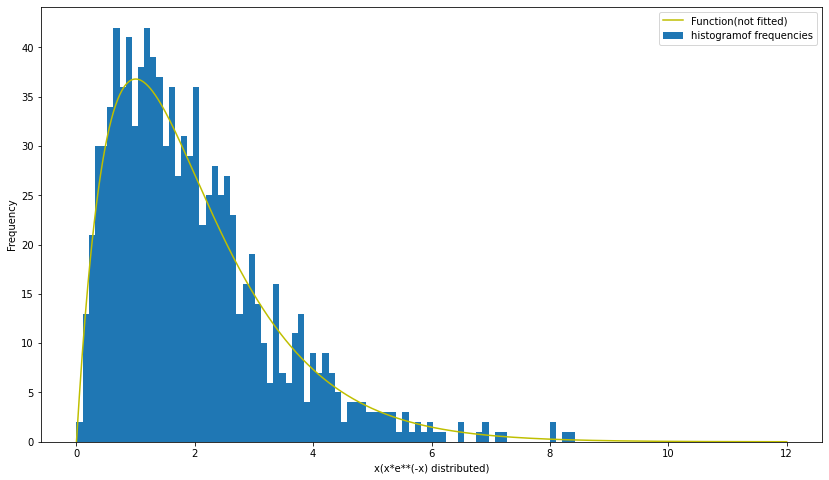

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols =1, figsize = (14,8))
Hist = ax.hist(x_acc, bins = Nbins, range=(xmin, np.max(x_acc)+2), histtype = 'bar', label='histogramof frequencies')
ax.set(xlabel='x(x*e**(-x) distributed)', ylabel='Frequency')

xaxis = np.linspace(xmin,12, 1000)
yaxis = Norm_PDF(C, xaxis)

PLOT  = ax.plot(xaxis, yaxis, '-y', label='Function(not fitted)')

ax.legend()

In [9]:
Median = np.median(x_acc)
print(f'The Median is : {Median:.3f}')

The Median is : 1.658
